In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
random_index = np.random.randint(0,len(train_images))
random_image = train_images[random_index]
random_label = train_labels[random_index]

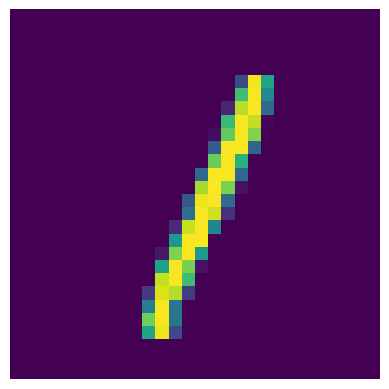

In [ ]:
plt.imshow(random_image)
plt.axis('off')
plt.show()

In [ ]:
random_image.shape

(28, 28)

In [ ]:
# Selecting 12 random images
num_samples = 12
random_indices = np.random.choice(train_images.shape[0], num_samples, replace=False)
sample_images = train_images[random_indices]
sample_labels = train_labels[random_indices]

In [ ]:
sample_labels

array([1, 8, 9, 8, 5, 9, 3, 1, 8, 0, 8, 1], dtype=uint8)

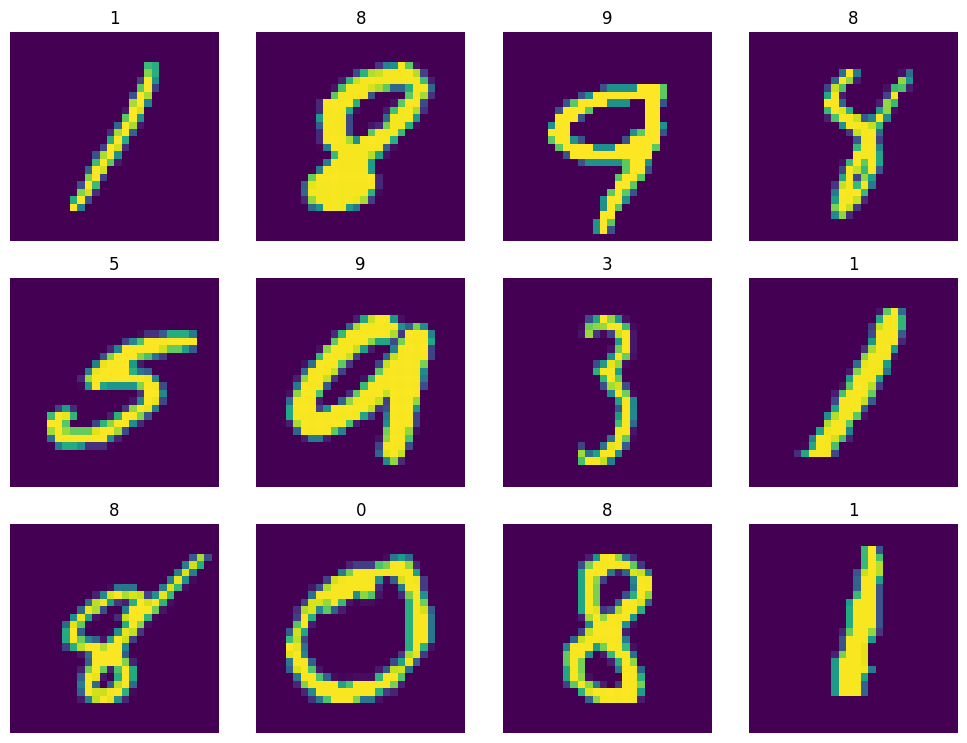

In [ ]:
# Plotting
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(4, 4, i + 1)
    plt.imshow(sample_images[i])
    # plt.title(i)


    plt.title(int(sample_labels[i]))  # sample_labels[i][0] is an index within the range of labels
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# Convolutional Neural Network Model
model = tf.keras.models.Sequential([
    # Ist Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # 2nd convolutional layer
    tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # ANN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Modeling
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 48s 50ms/step - loss: 0.2068 - accuracy: 0.9366 - val_loss: 0.0742 - val_accuracy: 0.9775
Epoch 2/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0421 - val_accuracy: 0.9860
Epoch 3/10
938/938 [==============================] - 45s 47ms/step - loss: 0.0438 - accuracy: 0.9863 - val_loss: 0.0411 - val_accuracy: 0.9862
Epoch 4/10
938/938 [==============================] - 45s 48ms/step - loss: 0.0332 - accuracy: 0.9896 - val_loss: 0.0325 - val_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 47s 50ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0325 - val_accuracy: 0.9906
Epoch 6/10
938/938 [==============================] - 43s 46ms/step - loss: 0.0229 - accuracy: 0.9930 - val_loss: 0.0297 - val_accuracy: 0.9911
Epoch 7/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0195 - accuracy: 0.9935 - val_loss: 0.0308 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [ ]:
loss,accuracy = model.evaluate(train_images,train_labels)
print(f"The model accuracy is : {accuracy} \n the model loss : {loss}")

1875/1875 [==============================] - 16s 8ms/step - loss: 0.0064 - accuracy: 0.9981
The model accuracy is : 0.9980833530426025 
 the model loss : 0.006434648297727108


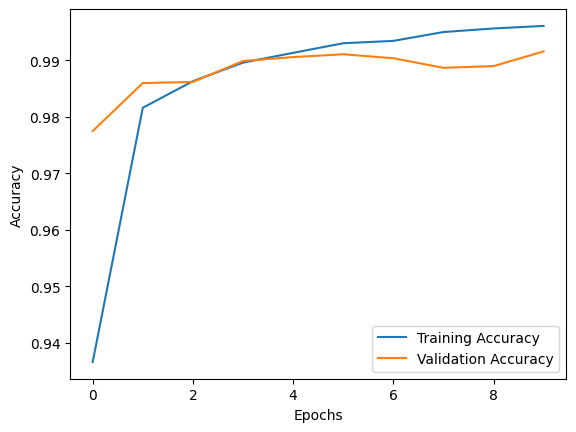

In [ ]:
# Graph

plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()
plt.show()